## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [2]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
#2 Check the shape of the DataFrame (rows, columns)
row,col=df.shape
print(row,col)
print(df.shape)
print(df.shape[0],df.shape[1])

545 13
(545, 13)
545 13


In [4]:
col=df.select_dtypes(include='number')
col

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [5]:
#3 Look at the data types of the columns

df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull()
df.isnull().sum()

df["bedrooms"].fillna(df["bedrooms"].mean(), inplace=False)

0      4
1      4
2      3
3      4
4      4
      ..
540    2
541    3
542    2
543    3
544    3
Name: bedrooms, Length: 545, dtype: int64

In [7]:
#5 Prepare  X (independent variables) and y (dependent variable)

x=df.drop(columns=["price"])
y=df["price"]

print(x.head())
print("\n\n")
print(y.head())




   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  7420         4          2        3      yes        no       no   
1  8960         4          4        4      yes        no       no   
2  9960         3          2        2      yes        no      yes   
3  7500         4          2        2      yes        no      yes   
4  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  



0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


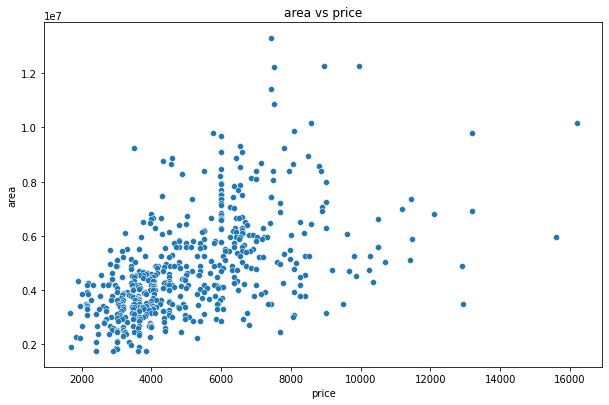

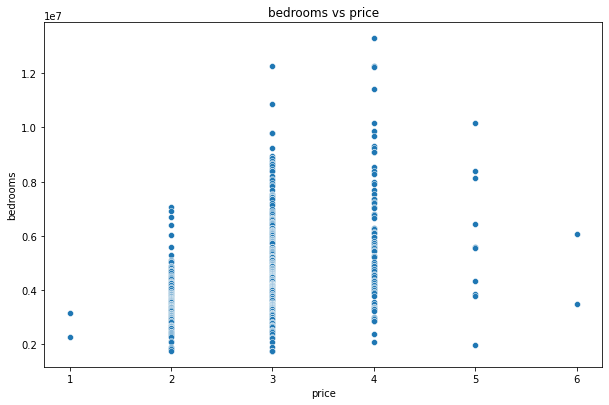

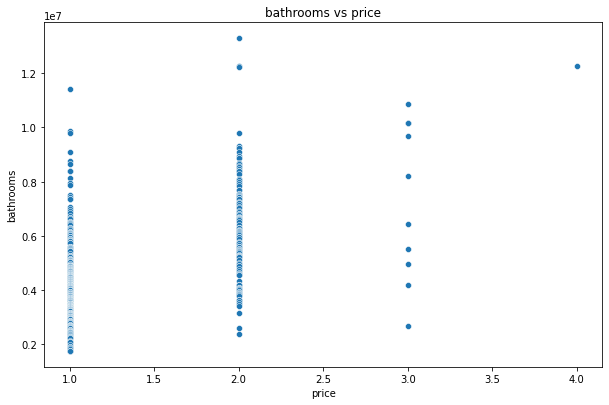

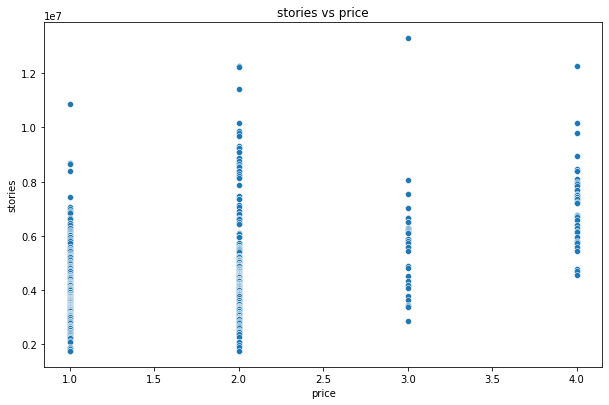

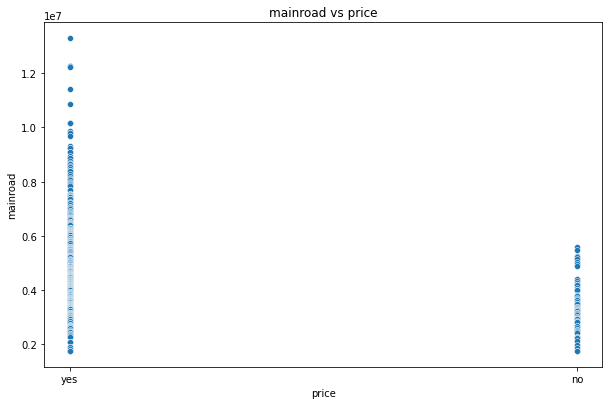

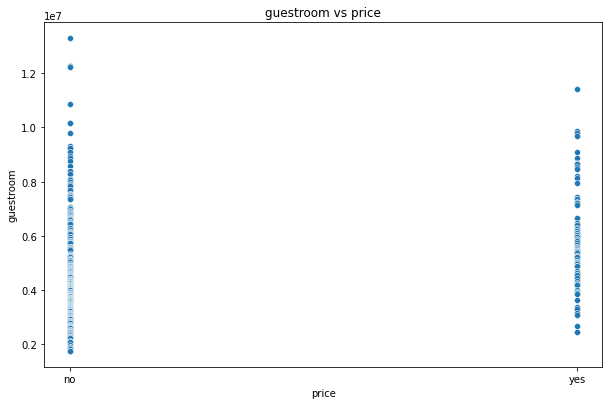

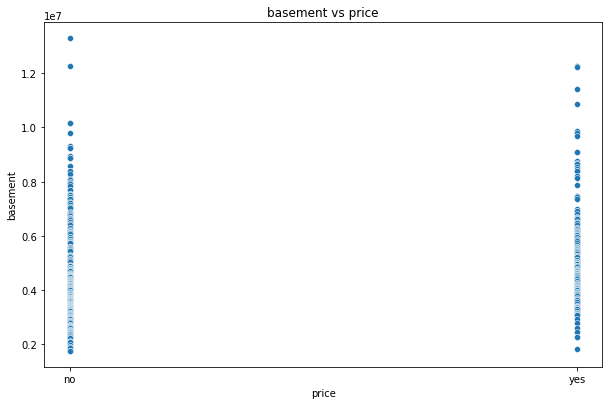

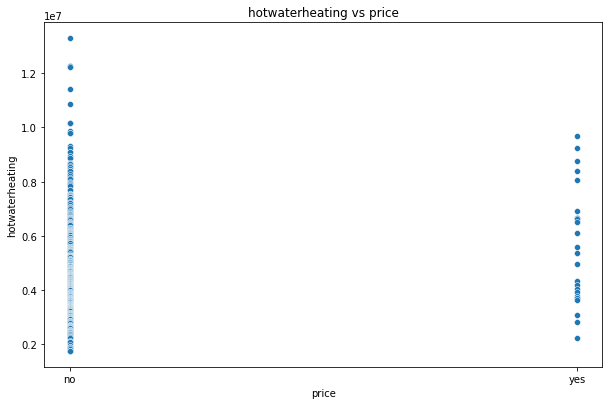

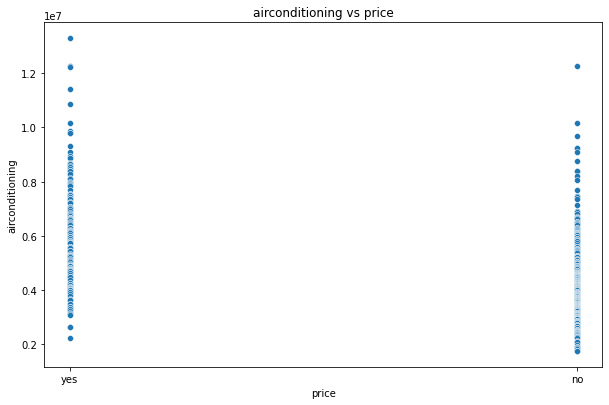

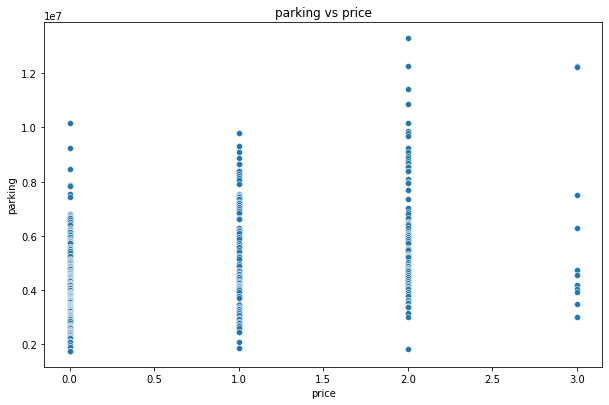

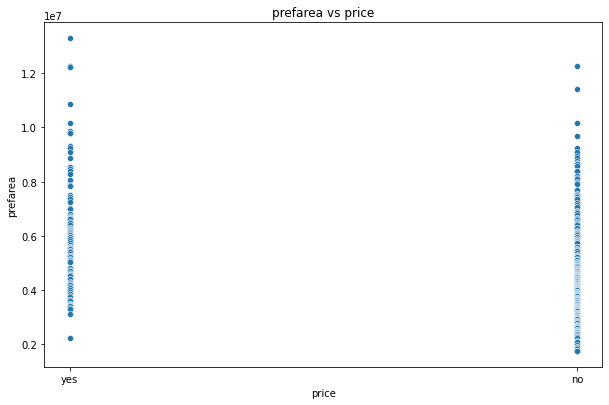

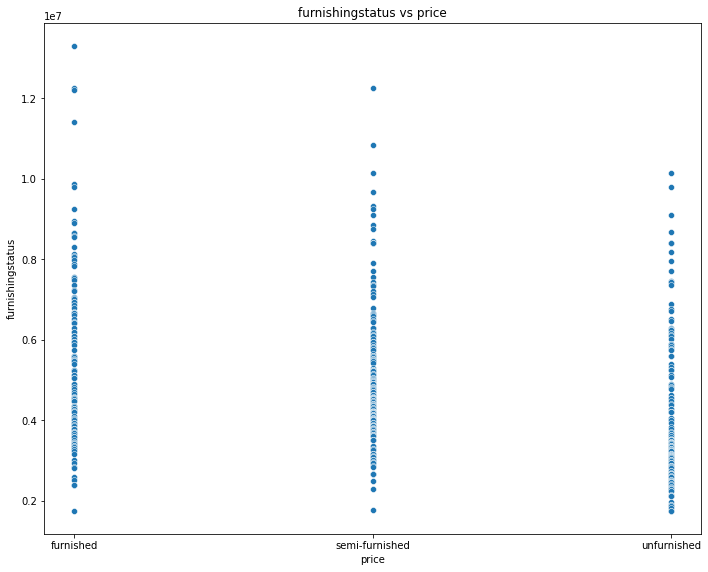

In [8]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


df = pd.read_csv("Housing.csv")
dependent="price"
independent=df.columns.drop(dependent)

     
for i,col in enumerate(independent):
    plt.figure(figsize=(10,90))
    plt.subplot(len(independent),1,i+1)
    sns.scatterplot(x=col,y=dependent,data=df)
    plt.title(f"{col} vs {dependent}")
    plt.xlabel(dependent)
    plt.ylabel(col)
  


    
plt.tight_layout()
plt.show()

In [9]:
#7 Encoding categorical data in X

import pandas as pd
from sklearn.preprocessing import LabelEncoder


encoder=LabelEncoder()
categorical_columns=df.select_dtypes(include=["object"]).columns
 
for col in categorical_columns:
    df[col]=encoder.fit_transform(df[col])

    


df




# we can do this also


# encoder=LabelEncoder()
# categorical_columns=df.select_dtypes(include=["object"]).columns
# df[col]=encoder.fit_transform(df[col])


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [10]:
#8  Avoiding the Dummy Variable Trap

# before avoiding dummy variable trap
df_dummies=pd.get_dummies(df["furnishingstatus"])
print(df_dummies)

# after avoiding dummy variable trap
df_dummies=pd.get_dummies(df["furnishingstatus"],drop_first=True)
print(df_dummies)

         0      1      2
0     True  False  False
1     True  False  False
2    False   True  False
3     True  False  False
4     True  False  False
..     ...    ...    ...
540  False  False   True
541  False   True  False
542  False  False   True
543   True  False  False
544  False  False   True

[545 rows x 3 columns]
         1      2
0    False  False
1    False  False
2     True  False
3    False  False
4    False  False
..     ...    ...
540  False   True
541   True  False
542  False   True
543  False  False
544  False   True

[545 rows x 2 columns]


In [11]:
df=pd.get_dummies(df,columns=["furnishingstatus"],drop_first=True,dtype=int)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_1,furnishingstatus_2
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [12]:
#9 Apply feature scaling on numerical variables

from sklearn.preprocessing import StandardScaler

# col=df.select_dtypes(include=['int','float']).columns
col=['price','area', 'bedrooms' ,'bathrooms' ,'stories'] # bedrooms ,bathrooms ,stories  are optional for feature scaling 
scaler=StandardScaler()

df[col]=scaler.fit_transform(df[col])

df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_1,furnishingstatus_2
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,2,1,0,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,3,0,0,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,2,1,1,0
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,3,1,0,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,1,0,1,0,0,2,0,0,1
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,0,0,0,0,0,0,0,1,0
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,1,0,0,0,0,0,0,0,1
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,0,0,0,0,0,0,0,0,0


In [13]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

import pandas as pd 
from sklearn.model_selection import train_test_split

x=df.drop(columns=["price"])
y=df["price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

print("shape of train :",x_train.shape,y_train.shape)
print("shape of test  :",x_test.shape,y_test.shape)

train_per=(len(x_train)/len(df))*100
test_per=(len(x_test)/len(df))*100

print("percentage of train : ",train_per)
print("percentage of test : ",test_per)

shape of train : (381, 13) (381,)
shape of test  : (164, 13) (164,)
percentage of train :  69.90825688073394
percentage of test :  30.091743119266056


In [19]:
#11 Fitting Multiple Linear Regression to the Training

from sklearn.linear_model import LinearRegression

X=x_train
Y=y_train

model=LinearRegression()

model.fit(X,Y)






LinearRegression()

In [21]:
#12 Predict on the train set and calculate the error = y_pred - y_train

y_pred=model.predict(X)

error =y_pred-y_train

print(error)

126   -0.310951
363   -0.058774
370    0.434597
31    -1.030769
113    0.123184
         ...   
71    -0.114851
106    0.134101
270    1.041953
435   -0.246290
102    0.527739
Name: price, Length: 381, dtype: float64


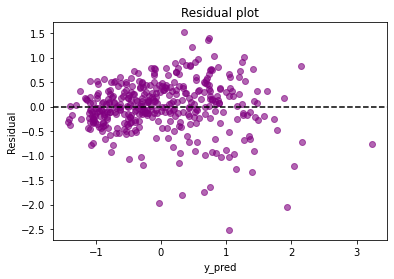

In [27]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

Residual =y_pred-y_train

plt.scatter(y_pred,Residual,color='purple',alpha=0.6)
plt.axhline(y=0,color="black",linestyle="--")
plt.title("Residual plot")
plt.xlabel("y_pred")
plt.ylabel("Residual")
plt.show()

In [30]:
#14  Predic on the test set

X_test=x_test
Y_test=y_test

model.fit(X_test,Y_test)

y_test_pred=model.predict(X_test)

Residual=y_test_pred-Y_test
print(Residual)

316    0.155134
77     0.519453
360   -0.418240
90    -0.719872
493    0.135993
         ...   
395    0.217005
425   -0.002938
195    0.553369
452    1.173682
154   -0.347648
Name: price, Length: 164, dtype: float64


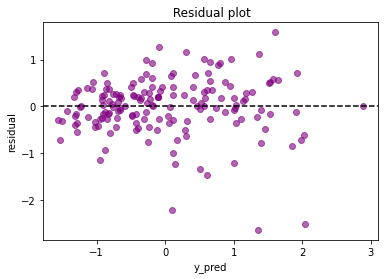

In [34]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
Residual=y_test_pred-Y_test
plt.scatter(x=y_test_pred,y=Residual,color="purple",alpha=0.6)
plt.axhline(y=0,color='black',linestyle="--")
plt.title(" Residual plot")
plt.xlabel("y_pred")
plt.ylabel("residual")
plt.show()

In [33]:
#16 Print Mean Squared Error and R Squared Value

from sklearn.metrics import mean_squared_error,r2_score

# for tarining data set
print("train error")
mse=mean_squared_error(y_train,y_pred)
r2=r2_score(y_train,y_pred)
print(f"MSE :{mse: .4f}")
print(f"r2 :{r2: .4f}")


print("\n \n test error")
# for testing data set
mse_t=mean_squared_error(y_test,y_test_pred)
r2_t=r2_score(y_test,y_test_pred)
print(f"MSE :{mse_t: .4f}")
print(f"r2 :{r2_t: .4f}")



train error
MSE : 0.2760
r2 : 0.6932

 
 test error
MSE : 0.3713
r2 : 0.6989


In [38]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)

# for training data set
print("for train ")
n=x_train.shape[0]
p=x_train.shape[1]

adj_r2=1-((1-r2)*(n-1)/(n-p-1))

print(f"{adj_r2: .4f}")


# for test data set
print("for test")
n_t=x_test.shape[0]
p_t=x_test.shape[1]

adj_r2_t=1-((1-r2_t)*(n_t-1)/(n_t-p_t-1))

print(f"{adj_r2_t: .4f}")


for train 
 0.6823
for test
 0.6728


In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)

# for training data set
print("for train ")
n=x_train.shape[0]
p=x_train.shape[1]


# 

def :
    t=x_train.iloc[:,i]
    n=t.shape[0]
    p=t.shape[1]
    adj_r2=1-((1-r2)*(n-1)/(n-p-1))
    print(f"{adj_r2: .4f}")

